1. スタジアムの緯度経度を取得する  
   lat_lng.ipynbで作成  
   APIを使って緯度経度を取得し、stadium.csvに追加すし、stadium_custum.csvで保存  
2. チームのホームスタジアムを取得する
3. trainのホームチーム、アウェイチームに対する緯度経度の列を追加する
4. ホームチーム、アウェイチームの距離を出す
   2点間の距離を計算し、train['distance(km)']を追加する
5. 観客0の試合をdfから削除
6. その試合の観客/スタジアムの比率の列を作る 動員率'mobilization'
7. 距離と動員率をグラフにする

In [899]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams["font.family"] = "meiryo" # 日本語の文字化け防止

In [900]:
train = pd.read_csv("train.csv")
stadium_custum = pd.read_csv("stadium_custum.csv")
condition = pd.read_csv("condition.csv")
# 列の抽出例
stadium_custum = stadium_custum.loc[:,['name', 'address', 'capa', 'lat_long']]
# stadium_custum['lat'] = stadium_custum['lat_long'][]
stadium_custum.head()

,name,address,capa,lat_long
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000,"('35.122681', '136.943404')"
1,豊田スタジアム,愛知県豊田市千石町7-2,40000,"('35.088621', '137.171555')"
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500,"('35.57696', '140.125569')"
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349,"('35.848792', '139.97567')"
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576,"('33.768536', '132.794947')"


緯度と経度を分けて列を作る

In [901]:
def get_lat(lat_long):
    point = lat_long.find(",")
    lat = lat_long[2:point-1]
    return float(lat)


def get_long(lat_long):
    point = lat_long.find(",")
    long = lat_long[point+3:-2]
    return float(long)

print(get_lat(stadium_custum.at[2, 'lat_long']))

35.57696


In [902]:
stadium_custum['lat'] = stadium_custum['lat_long'].apply(get_lat)
stadium_custum['long'] = stadium_custum['lat_long'].apply(get_long)
stadium_custum.head()

,name,address,capa,lat_long,lat,long
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000,"('35.122681', '136.943404')",35.122681,136.943404
1,豊田スタジアム,愛知県豊田市千石町7-2,40000,"('35.088621', '137.171555')",35.088621,137.171555
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500,"('35.57696', '140.125569')",35.576960,140.125569
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349,"('35.848792', '139.97567')",35.848792,139.975670
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576,"('33.768536', '132.794947')",33.768536,132.794947


homeの時に使っているstadiumは

In [903]:
team_home_stadium = train.groupby('home')['stadium'].unique().reset_index()
team_home_stadium

,home,stadium
0,アビスパ福岡,[レベルファイブスタジアム]
1,アルビレックス新潟,[デンカビッグスワンスタジアム]
2,カターレ富山,[富山県総合運動公園陸上競技場]
3,カマタマーレ讃岐,[香川県立丸亀競技場]
4,ガイナーレ鳥取,[とりぎんバードスタジアム]
5,ガンバ大阪,[万博記念競技場]
6,ギラヴァンツ北九州,[北九州市立本城陸上競技場]
7,コンサドーレ札幌,"[札幌ドーム, 札幌厚別公園競技場]"
8,サガン鳥栖,"[ベストアメニティスタジアム, 佐賀県総合運動場陸上競技場]"
9,サンフレッチェ広島,[エディオンスタジアム広島]


2つ以上のスタジアムをホーム時に使っているチームは

In [904]:
team_home_stadium[team_home_stadium['stadium'].apply(lambda x: len(x) > 1)]

,home,stadium
7,コンサドーレ札幌,"[札幌ドーム, 札幌厚別公園競技場]"
8,サガン鳥栖,"[ベストアメニティスタジアム, 佐賀県総合運動場陸上競技場]"
13,ジュビロ磐田,"[ヤマハスタジアム（磐田）, エコパスタジアム]"
14,セレッソ大阪,"[ヤンマースタジアム長居, キンチョウスタジアム]"
15,ファジアーノ岡山,"[シティライトスタジアム, 岡山県津山陸上競技場]"
16,ベガルタ仙台,"[ユアテックスタジアム仙台, 宮城スタジアム]"
18,ロアッソ熊本,"[うまかな・よかなスタジアム, 熊本市水前寺競技場]"
19,ヴァンフォーレ甲府,"[山梨中銀スタジアム, 国立競技場]"
20,ヴィッセル神戸,"[ノエビアスタジアム神戸, 神戸総合運動公園ユニバー記念競技場]"
21,京都サンガF.C.,"[京都市西京極総合運動公園陸上競技場兼球技場, 鹿児島県立鴨池陸上競技場 ]"


調べて、正式なホームスタジアムを一つにする  
下記、調べた結果  
	home	stadium  
7	コンサドーレ札幌	[札幌ドーム]  
8	サガン鳥栖	[ベストアメニティスタジアム]  
13	ジュビロ磐田	[ヤマハスタジアム（磐田）]  
14	セレッソ大阪	[キンチョウスタジアム]  
15	ファジアーノ岡山	[シティライトスタジアム]  
16	ベガルタ仙台	[ユアテックスタジアム仙台]  
18	ロアッソ熊本	[うまかな・よかなスタジアム]  
19	ヴァンフォーレ甲府	[山梨中銀スタジアム]  
20	ヴィッセル神戸	[ノエビアスタジアム神戸]  
21	京都サンガF.C.	[京都市西京極総合運動公園陸上競技場兼球技場]  
22	名古屋グランパス	[豊田スタジアム]  
24	大宮アルディージャ	[ＮＡＣＫ５スタジアム大宮]  
28	東京ヴェルディ	[味の素スタジアム]  
30	柏レイソル	[日立柏サッカー場]  
32	横浜Ｆ・マリノス	[日産スタジアム]  
33	横浜ＦＣ	[ニッパツ三ツ沢球技場]  
36	清水エスパルス	[ＩＡＩスタジアム日本平]  
39	ＦＣ岐阜	[岐阜メモリアルセンター長良川競技場]  
40	ＦＣ東京	[味の素スタジアム]  
41	ＦＣ町田ゼルビア	[町田市立陸上競技場]  

In [905]:
team_home_stadium.loc[team_home_stadium['home'] == 'コンサドーレ札幌', 'stadium'] = '札幌ドーム'
team_home_stadium.loc[team_home_stadium['home'] == 'サガン鳥栖', 'stadium'] = 'ベストアメニティスタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ジュビロ磐田', 'stadium'] = 'ヤマハスタジアム（磐田）'
team_home_stadium.loc[team_home_stadium['home'] == 'セレッソ大阪', 'stadium'] = 'キンチョウスタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ファジアーノ岡山', 'stadium'] = 'シティライトスタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ベガルタ仙台', 'stadium'] = 'ユアテックスタジアム仙台'
team_home_stadium.loc[team_home_stadium['home'] == 'ロアッソ熊本', 'stadium'] = 'うまかな・よかなスタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ヴァンフォーレ甲府', 'stadium'] = '山梨中銀スタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ヴィッセル神戸', 'stadium'] = 'ノエビアスタジアム神戸'
team_home_stadium.loc[team_home_stadium['home'] == '京都サンガF.C.', 'stadium'] = '京都市西京極総合運動公園陸上競技場兼球技場'
team_home_stadium.loc[team_home_stadium['home'] == '名古屋グランパス', 'stadium'] = '豊田スタジアム'
team_home_stadium.loc[team_home_stadium['home'] == '大宮アルディージャ', 'stadium'] = 'ＮＡＣＫ５スタジアム大宮'
team_home_stadium.loc[team_home_stadium['home'] == '東京ヴェルディ', 'stadium'] = '味の素スタジアム'
team_home_stadium.loc[team_home_stadium['home'] == '柏レイソル', 'stadium'] = '日立柏サッカー場'
team_home_stadium.loc[team_home_stadium['home'] == '横浜Ｆ・マリノス', 'stadium'] = '日産スタジアム'
team_home_stadium.loc[team_home_stadium['home'] == '横浜ＦＣ', 'stadium'] = 'ニッパツ三ツ沢球技場'
team_home_stadium.loc[team_home_stadium['home'] == '清水エスパルス', 'stadium'] = 'ＩＡＩスタジアム日本平'
team_home_stadium.loc[team_home_stadium['home'] == 'ＦＣ岐阜', 'stadium'] = '岐阜メモリアルセンター長良川競技場'
team_home_stadium.loc[team_home_stadium['home'] == 'ＦＣ東京', 'stadium'] = '味の素スタジアム'
team_home_stadium.loc[team_home_stadium['home'] == 'ＦＣ町田ゼルビア', 'stadium'] = '町田市立陸上競技場'

team_home_stadium['stadium'] = team_home_stadium['stadium'].apply(''.join)
team_home_stadium.head()

,home,stadium
0,アビスパ福岡,レベルファイブスタジアム
1,アルビレックス新潟,デンカビッグスワンスタジアム
2,カターレ富山,富山県総合運動公園陸上競技場
3,カマタマーレ讃岐,香川県立丸亀競技場
4,ガイナーレ鳥取,とりぎんバードスタジアム


In [906]:
# 列名'home'を'team'に変更
team_home_stadium = team_home_stadium.rename(columns={'home':'team'}) 
team_home_stadium.head()

,team,stadium
0,アビスパ福岡,レベルファイブスタジアム
1,アルビレックス新潟,デンカビッグスワンスタジアム
2,カターレ富山,富山県総合運動公園陸上競技場
3,カマタマーレ讃岐,香川県立丸亀競技場
4,ガイナーレ鳥取,とりぎんバードスタジアム


In [907]:
# 列名'name'を'stadium'に変更
stadium_custum = stadium_custum.rename(columns={'name':'stadium'}) 
team_home_stadium = pd.merge(team_home_stadium, stadium_custum, on="stadium")
#文字コードをutf8に統一する為に、encoding="utf8"というオプションを記載
team_home_stadium.to_csv("team_home_stadium.csv",index=None,encoding="utf8")
team_home_stadium.head()

,team,stadium,address,capa,lat_long,lat,long
0,アビスパ福岡,レベルファイブスタジアム,福岡県福岡市博多区東平尾公園2-1-1,22563,"('33.586139', '130.460089')",33.586139,130.460089
1,アルビレックス新潟,デンカビッグスワンスタジアム,新潟県新潟市中央区清五郎67-12,42300,"('37.882408', '139.059359')",37.882408,139.059359
2,カターレ富山,富山県総合運動公園陸上競技場,富山県富山市南中田368,25250,"('36.624048', '137.197171')",36.624048,137.197171
3,カマタマーレ讃岐,香川県立丸亀競技場,香川県丸亀市金倉町830,22338,"('34.261684', '133.786361')",34.261684,133.786361
4,ガイナーレ鳥取,とりぎんバードスタジアム,鳥取県鳥取市蔵田423,16033,"('35.458273', '134.221166')",35.458273,134.221166


trainのホームチーム、アウェイチームに対する緯度経度の列を追加する

In [908]:
def get_team_lat(team_name):
    """
    team_nameにチーム名指定するとチームのホームスタジアムの緯度を返す。

    >>> get_latlong('横浜ＦＣ')
    35.471264
    """
    lat = team_home_stadium.loc[team_home_stadium['team'] == team_name, 'lat']
    return float(lat)


def get_team_long(team_name):
    long = team_home_stadium.loc[team_home_stadium['team'] == team_name, 'long']
    return float(long)

# print(get_team_lat('ガイナーレ鳥取'))
# print(get_team_lat(team_home_stadium.at[2, 'team']))

In [909]:
train['home_lat']  = train['home'].apply(get_team_lat)
train['home_long']  = train['home'].apply(get_team_long)
train['away_lat']  = train['away'].apply(get_team_lat)
train['away_long']  = train['away'].apply(get_team_long)
train.head(1)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_lat,home_long,away_lat,away_long
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,38.319158,140.881857,35.992776,140.641766


2点間の距離を計算し、train['distance(km)']を追加する
pip install geopy

In [910]:
'''
from geopy.distance import geodesic

# (緯度, 経度)
TokyoStation = (35.681382, 139.76608399999998)
NagoyaStation = (35.170915, 136.881537)

dis = geodesic(TokyoStation, NagoyaStation).km

print(dis)
# 267.9938255019848
'''

'\nfrom geopy.distance import geodesic\n\n# (緯度, 経度)\nTokyoStation = (35.681382, 139.76608399999998)\nNagoyaStation = (35.170915, 136.881537)\n\ndis = geodesic(TokyoStation, NagoyaStation).km\n\nprint(dis)\n# 267.9938255019848\n'

In [911]:
from geopy.distance import geodesic


def get_km(row):
    """
    homeTeam, awayTeamに緯度経度を指定すると2点間の距離を返す。

    >>> (35.681382, 139.76608399999998), (35.170915, 136.881537)
    267.9938255019848
    """
    homeTeam = row['home_lat'], row['home_long']
    awayTeam = row['away_lat'], row['away_long']
    
    
    dis = geodesic(homeTeam, awayTeam).km
    return dis

# print(get_km((35.681382, 139.76608399999998), (35.170915, 136.881537)))
# 267.9938255019848

In [912]:
train['distance(km)'] = train.apply(get_km, axis=1)
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_lat,home_long,away_lat,away_long,distance(km)
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,38.319158,140.881857,35.992776,140.641766,259.062331
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,35.088621,137.171555,34.985168,138.481305,120.059935
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,34.811971,135.541163,34.656726,135.168171,38.255309
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,34.441236,132.395422,35.902000,139.714677,685.986038
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,42.990187,141.392009,34.722804,137.878302,966.885906


In [913]:
# 観客0の試合をdfから削除
train = train.drop(train.index[1385])
train[train['y']==0] # 確認OK

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_lat,home_long,away_lat,away_long,distance(km)


スタジアムごとの観客の比率をみる

capaをtrainに追加する

In [914]:
stadium_capa = stadium_custum[["stadium", "capa"]]
stadium_capa.head()

,stadium,capa
0,名古屋市瑞穂陸上競技場,20000
1,豊田スタジアム,40000
2,フクダ電子アリーナ,18500
3,日立柏サッカー場,15349
4,ニンジニアスタジアム,15576


In [915]:
train = pd.merge(train, stadium_capa, on="stadium")
train.head(1)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_lat,home_long,away_lat,away_long,distance(km),capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,38.319158,140.881857,35.992776,140.641766,259.062331,19694


In [916]:
# print(get_mobilization(train[0:1]))
def get_mobilization(row):
    # 観客数/収容人数を計算する
    mobilization = row['y'] / row['capa']
    return mobilization

# print(get_km((35.681382, 139.76608399999998), (35.170915, 136.881537)))
# 267.9938255019848

In [917]:
# 観客y/スタジアムcapa で'mobilization'列（観客動員率）を作る
train['mobilization'] = train.apply(get_mobilization, axis=1)
train.head(1)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_lat,home_long,away_lat,away_long,distance(km),capa,mobilization
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,38.319158,140.881857,35.992776,140.641766,259.062331,19694,0.926678


グラフを表示  
距離と観客率の関係

<AxesSubplot:xlabel='distance(km)', ylabel='mobilization'>

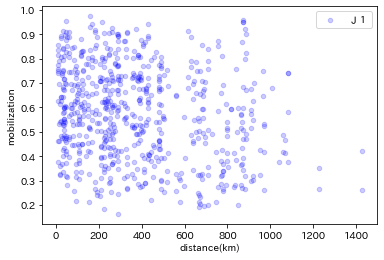

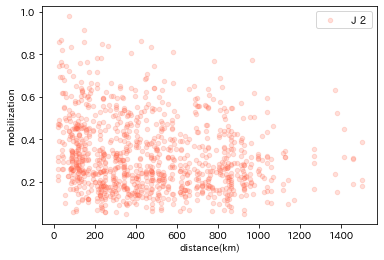

In [918]:
train[train['stage'] == 'Ｊ１'].plot.scatter(x='distance(km)', y='mobilization', label='Ｊ１', color='blue', alpha=0.2)
train[train['stage'] == 'Ｊ２'].plot.scatter(x='distance(km)', y='mobilization', label='Ｊ２', color='tomato', alpha=0.2)

距離と観客数の関係

<AxesSubplot:xlabel='distance(km)', ylabel='y'>

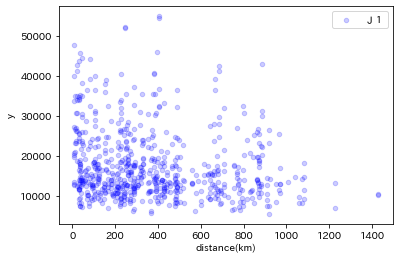

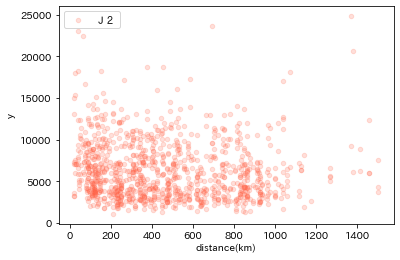

In [919]:
train[train['stage'] == 'Ｊ１'].plot.scatter(x='distance(km)', y='y', label='Ｊ１', color='blue', alpha=0.2)
train[train['stage'] == 'Ｊ２'].plot.scatter(x='distance(km)', y='y', label='Ｊ２', color='tomato', alpha=0.2)

In [920]:
train = pd.merge(train, condition, on="id")
train.head(1)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ


In [921]:
revel_90 = train[train['mobilization'] > 0.9 ]
revel_90["referee"].value_counts()

東城　穣          5
吉田　寿光         3
木村　博之         2
佐藤　隆治         2
松尾　一          2
村上　伸次         2
扇谷　健司         2
飯田　淳平         1
西村　雄一         1
山本　雄大         1
高山　啓義         1
アントニオ　アリアス    1
廣瀬　格          1
今村　義朗         1
河合　英治         1
Name: referee, dtype: int64

<AxesSubplot:xlabel='home_lat', ylabel='y'>

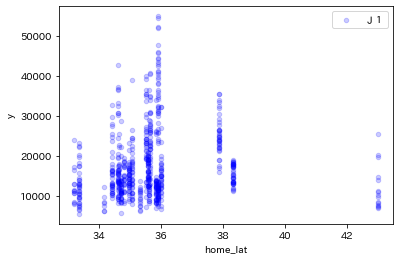

In [922]:
train[train['stage'] == 'Ｊ１'].plot.scatter(x='home_lat', y='y', label='Ｊ１', color='blue', alpha=0.2)

In [923]:
sort_team_home_stadium = team_home_stadium.sort_values('lat')
sort_team_home_stadium.head()


,team,stadium,address,capa,lat_long,lat,long
42,Ｖ・ファーレン長崎,長崎県立総合運動公園陸上競技場,長崎県諫早市宇都町27-1,20246,"('32.834076', '130.045826')",32.834076,130.045826
18,ロアッソ熊本,うまかな・よかなスタジアム,熊本県熊本市東区平山町2776,32000,"('32.837386', '130.79946')",32.837386,130.799460
23,大分トリニータ,大分銀行ドーム,大分県大分市大字横尾1351,40000,"('33.200786', '131.6575')",33.200786,131.657500
8,サガン鳥栖,ベストアメニティスタジアム,佐賀県鳥栖市京町812,24490,"('33.372508', '130.520424')",33.372508,130.520424
0,アビスパ福岡,レベルファイブスタジアム,福岡県福岡市博多区東平尾公園2-1-1,22563,"('33.586139', '130.460089')",33.586139,130.460089


In [924]:
sort_stadium = sort_team_home_stadium['long'].tolist()
sort_stadium

[130.045826,
 130.79946,
 131.6575,
 130.520424,
 130.460089,
 132.794947,
 130.730906,
 134.615254,
 133.786361,
 132.395422,
 135.525871,
 135.168171,
 133.91539,
 137.878302,
 135.541163,
 138.481305,
 135.715575,
 137.171555,
 139.343132,
 136.763069,
 134.221166,
 139.60246,
 139.606337,
 140.125569,
 139.647336,
 139.4383,
 138.584328,
 139.525096,
 139.525096,
 139.97567,
 139.714677,
 139.63182,
 140.641766,
 137.916485,
 140.411495,
 139.05222,
 139.05222,
 139.98623,
 137.197171,
 139.059359,
 140.881857,
 140.374318,
 141.392009]

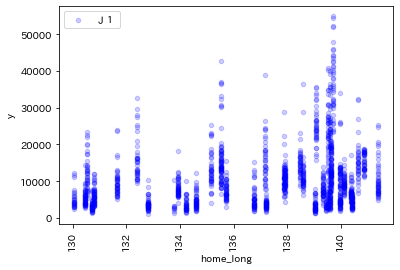

In [925]:
# plt.xticks('stadium', 'sort_stadium')  
# plt.rcParams["figure.figsize"] = [17,8]  
# 
# (x='stadium', y='mobilization', label='Ｊ１', color='blue', alpha=0.2)
train.plot.scatter(x='home_long', y='y', label='Ｊ１', color='blue', alpha=0.2)
# plt.xlabel('sort_stadium')
plt.xticks(rotation=90) # x軸の名前を90度回転させて縦に表示
plt.show()

In [926]:
cb = pd.pivot_table(train, index="away_long", columns="away_long", values="mobilization")
plt.figure(figsize=(8,6))

ax =sns.heatmap(cb, cmap='Blues')
# ax.invert_yaxis()

# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(uniform_data)
# ax.invert_yaxis()

ValueError: Grouper for 'away_long' not 1-dimensional